In [62]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  model_backup  sample_data/


In [ ]:
cd '/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/Parte II - Machine Learning Baseline'

/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/Parte III - Machine Learning


In [2]:
df_train = pd.read_csv('../ieee-fraud-detection/train_merged.csv')
df_test = pd.read_csv('../ieee-fraud-detection/test_merged.csv')

In [3]:
df_train.shape,df_test.shape

((590540, 434), (506691, 433))

In [4]:
del df_train['TransactionID']
# saco el transaction id momentaniamente del test para que durante el encoding asegurarme 
# de tener las mismas columnas en el mismo orden.
transactionIDtest = df_test['TransactionID']
del df_test['TransactionID']

### Features más importantes

#### Features numéricos

In [8]:
matrix_corr = df_train.corr()
matrix_corr.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,0.021522,...,0.150100,0.050004,-0.041721,0.061597,0.063544,0.118409,-0.001905,0.034045,0.099587,0.069702
TransactionDT,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,-0.027295,...,0.214802,0.110234,-0.011815,0.082009,-0.024249,0.051437,-0.031312,0.020372,0.017790,-0.071392
TransactionAmt,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,0.026146,...,-0.334971,-0.096851,0.076174,-0.105866,-0.031840,-0.104620,0.080110,0.016145,0.023098,-0.041851
card1,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,0.005152,...,0.018892,0.008869,0.022617,0.015917,0.044073,0.016853,0.057550,-0.010192,0.078487,-0.009524
card2,0.003388,-0.019202,0.016136,0.004960,1.000000,0.023816,0.030486,0.030356,-0.022383,-0.013374,...,-0.038135,-0.012282,0.016537,-0.006812,0.002807,-0.024013,0.000844,-0.009787,0.006429,-0.031503


In [56]:
isFraud_target = abs(matrix_corr['isFraud'].drop('isFraud')).sort_values(ascending=False)
# hago el abs porque los valores muy negativos ayudan a predecir 0
isFraud_target.head()

V257    0.383060
V246    0.366878
V244    0.364129
V242    0.360590
V201    0.328005
Name: isFraud, dtype: float64

In [57]:
isFraud_target=isFraud_target.reset_index()
isFraud_target.set_axis(['Features','isFraud'],axis=1,inplace=True)

In [58]:
isFraud_target

,Features,isFraud
0,V257,0.383060
1,V246,0.366878
2,V244,0.364129
3,V242,0.360590
4,V201,0.328005
...,...,...
396,V299,0.000308
397,V135,0.000276
398,V137,0.000115
399,V319,0.000061


<AxesSubplot:xlabel='Features', ylabel='isFraud'>

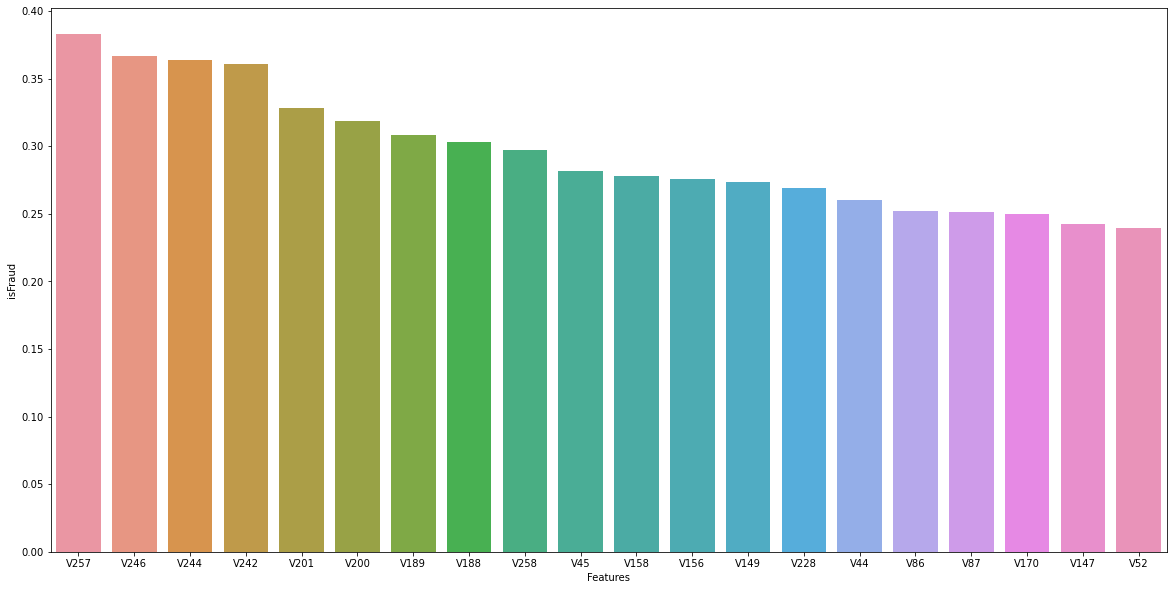

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=isFraud_target.Features[:20],y=isFraud_target.isFraud[:20])

Los VXXX parecen ser los mas importantes

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_train, df_train.isFraud, test_size=0.2, shuffle=False)
del df_train

In [6]:
cat_columns_x_train=x_train.select_dtypes(include=object).columns
num_columns_x_train=x_train.select_dtypes(exclude=object).columns

cat_columns_x_test=x_test.select_dtypes(include=object).columns
num_columns_x_test=x_test.select_dtypes(exclude=object).columns

cat_columns_df_test=df_test.select_dtypes(include=object).columns
num_columns_df_test=df_test.select_dtypes(exclude=object).columns

In [7]:
x_train[num_columns_x_train]=x_train[num_columns_x_train].fillna(0)
x_test[num_columns_x_test]=x_test[num_columns_x_test].fillna(0)
df_test[num_columns_df_test]=df_test[num_columns_df_test].fillna(0)

In [ ]:
def change_NaN_values_to_prefix_unknown(df,cat_columns):
  for column_name in cat_columns:
    nan_name = column_name +'_'+'unknown'
    df[column_name].fillna(nan_name,inplace=True)

In [ ]:
change_NaN_values_to_prefix_unknown(x_train,cat_columns_x_train)
change_NaN_values_to_prefix_unknown(x_test,cat_columns_x_test)
change_NaN_values_to_prefix_unknown(df_test,cat_columns_df_test)

In [ ]:
x_test.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
472432,1,12192900,33.261,C,9300,103.0,185.0,visa,138.0,debit,0.0,0.0,0.0,0.0,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,-5.0,175301.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,64.0,0.0,New,NotFound,225.0,15.0,427.0,417.0,0.0,0.0,id_23_unknown,0.0,0.0,0.0,id_27_unknown,New,NotFound,id_30_unknown,chrome 65.0,0.0,id_33_unknown,id_34_unknown,F,F,T,F,desktop,DeviceInfo_unknown
472433,0,12192911,52.811,C,8809,179.0,106.0,visa,137.0,debit,0.0,0.0,0.0,0.0,hotmail.fr,hotmail.fr,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,-10.0,978553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,64.0,0.0,New,NotFound,225.0,0.0,266.0,305.0,0.0,0.0,id_23_unknown,0.0,0.0,0.0,id_27_unknown,New,NotFound,id_30_unknown,chrome generic for android,0.0,id_33_unknown,id_34_unknown,F,F,T,F,mobile,F3311
472434,0,12192913,136.956,C,10819,555.0,185.0,visa,226.0,debit,0.0,0.0,0.0,0.0,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,...,-5.0,128616.0,6.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,100.0,NotFound,52.0,0.0,Found,Found,225.0,0.0,266.0,507.0,0.0,0.0,id_23_unknown,0.0,0.0,0.0,id_27_unknown,Found,Found,id_30_unknown,chrome 65.0,0.0,id_33_unknown,id_34_unknown,F,F,T,F,desktop,Windows
472435,0,12193040,136.956,C,9633,130.0,185.0,visa,138.0,debit,0.0,0.0,0.0,0.0,hotmail.com,hotmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,...,-5.0,118389.0,6.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,100.0,NotFound,52.0,0.0,Found,Found,225.0,0.0,266.0,507.0,0.0,0.0,id_23_unknown,0.0,0.0,0.0,id_27_unknown,Found,Found,id_30_unknown,chrome 65.0,0.0,id_33_unknown,id_34_unknown,F,F,T,F,desktop,Windows
472436,0,12193199,25.000,H,17188,321.0,150.0,visa,226.0,debit,310.0,87.0,0.0,0.0,outlook.com,R_emaildomain_unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,-5.0,99026.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-420.0,New,NotFound,166.0,0.0,410.0,225.0,0.0,0.0,id_23_unknown,0.0,0.0,0.0,id_27_unknown,New,NotFound,Windows 10,firefox 59.0,24.0,3200x1800,match_status:2,T,F,T,T,desktop,Windows


## Encoding de variables categoricas

Estas son las variables categoricas que hay

In [ ]:
print(cat_columns_x_train)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


### X_emaildomain

In [ ]:
x_train['P_emaildomain'].value_counts()

gmail.com                182692
yahoo.com                 80854
P_emaildomain_unknown     73586
hotmail.com               37158
anonymous.com             29961
aol.com                   22618
comcast.net                6496
icloud.com                 5031
outlook.com                4080
msn.com                    3340
att.net                    3133
live.com                   2475
sbcglobal.net              2395
verizon.net                2252
ymail.com                  1914
bellsouth.net              1580
yahoo.com.mx               1285
me.com                     1269
cox.net                    1121
optonline.net               835
charter.net                 688
live.com.mx                 624
rocketmail.com              520
mail.com                    452
gmail                       411
earthlink.net               408
outlook.es                  377
mac.com                     360
juno.com                    271
aim.com                     268
roadrunner.com              249
hotmail.

In [ ]:
vectorizer = CountVectorizer(lowercase=True,max_features=20)

In [ ]:
matrix = vectorizer.fit_transform(x_train.pop('P_emaildomain'))
matrix

<472432x20 sparse matrix of type '<class 'numpy.int64'>'
	with 863364 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

{'anonymous': 0,
 'aol': 1,
 'att': 2,
 'bellsouth': 3,
 'com': 4,
 'comcast': 5,
 'gmail': 6,
 'hotmail': 7,
 'icloud': 8,
 'live': 9,
 'me': 10,
 'msn': 11,
 'mx': 12,
 'net': 13,
 'outlook': 14,
 'p_emaildomain_unknown': 15,
 'sbcglobal': 16,
 'verizon': 17,
 'yahoo': 18,
 'ymail': 19}

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=list(vectorizer.vocabulary_.keys()),index=x_train.index))
x_test=x_test.join(pd.DataFrame(vectorizer.transform(x_test.pop('P_emaildomain')).toarray(),columns=list(vectorizer.vocabulary_.keys()),index=x_test.index))
df_test=df_test.join(pd.DataFrame(vectorizer.transform(df_test.pop('P_emaildomain')).toarray(),columns=list(vectorizer.vocabulary_.keys()),index=df_test.index))

In [ ]:
matrix = vectorizer.fit_transform(x_train.pop('R_emaildomain'))
matrix

<472432x20 sparse matrix of type '<class 'numpy.int64'>'
	with 584789 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

{'anonymous': 0,
 'aol': 1,
 'com': 2,
 'comcast': 3,
 'cox': 4,
 'de': 5,
 'es': 6,
 'gmail': 7,
 'hotmail': 8,
 'icloud': 9,
 'live': 10,
 'me': 11,
 'msn': 12,
 'mx': 13,
 'net': 14,
 'outlook': 15,
 'r_emaildomain_unknown': 16,
 'sbcglobal': 17,
 'verizon': 18,
 'yahoo': 19}

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=list(vectorizer.vocabulary_.keys()),index=x_train.index),rsuffix='_R_emaildomain')
x_test=x_test.join(pd.DataFrame(vectorizer.transform(x_test.pop('R_emaildomain')).toarray(),columns=list(vectorizer.vocabulary_.keys()),index=x_test.index),rsuffix='_R_emaildomain')
df_test=df_test.join(pd.DataFrame(vectorizer.transform(df_test.pop('R_emaildomain')).toarray(),columns=list(vectorizer.vocabulary_.keys()),index=df_test.index),rsuffix='_R_emaildomain')

### Product CD

In [ ]:
x_train.ProductCD.value_counts()

W    346001
C     56410
R     32203
H     29691
S      8127
Name: ProductCD, dtype: int64

In [ ]:
hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['ProductCD']])
matrix.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['ProductCD']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['ProductCD']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['ProductCD']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['ProductCD']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['ProductCD']

### card4

In [ ]:
x_train.card4.value_counts()

visa                308141
mastercard          150862
american express      7202
discover              5394
card4_unknown          833
Name: card4, dtype: int64

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['card4']])
matrix.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['card4_american express', 'card4_card4_unknown', 'card4_discover',
       'card4_mastercard', 'card4_visa'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['card4']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['card4']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['card4']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['card4']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['card4']

In [ ]:
# x_train=x_train.join(pd.get_dummies(x_train.pop('card4')))
# x_test=x_test.join(pd.get_dummies(x_test.pop('card4')))
# df_test=df_test.join(pd.get_dummies(df_test.pop('card4')))

### card6

In [ ]:
x_train.card6.value_counts()

debit              349843
credit             121716
card6_unknown         828
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['card6']])
matrix.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['card6_card6_unknown', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_debit or credit'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['card6']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['card6']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['card6']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['card6']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['card6']

In [ ]:
# x_train=x_train.join(pd.get_dummies(x_train.pop('card6')))
# x_test=x_test.join(pd.get_dummies(x_test.pop('card6')))
# df_test=df_test.join(pd.get_dummies(df_test.pop('card6')))

### MX

Salvo M4 son features que parecen booleanas, las que tengan mayor cantidad de valor el 'unkown' los voy a encodear con 1 si tiene feature y 0 si no.

In [ ]:
x_train.M1.value_counts()

M1_unknown    238295
T             234116
F                 21
Name: M1, dtype: int64

In [ ]:
x_train.M1 = pd.Series(np.where(x_train.M1.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M1 = pd.Series(np.where(x_test.M1.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M1 = pd.Series(np.where(df_test.M1.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M2.value_counts()

M2_unknown    238295
T             210007
F              24130
Name: M2, dtype: int64

In [ ]:
x_train.M2 = pd.Series(np.where(x_train.M2.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M2 = pd.Series(np.where(x_test.M2.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M2 = pd.Series(np.where(df_test.M2.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M3.value_counts()

M3_unknown    238295
T             184780
F              49357
Name: M3, dtype: int64

In [ ]:
x_train.M3 = pd.Series(np.where(x_train.M3.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M3 = pd.Series(np.where(x_test.M3.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M3 = pd.Series(np.where(df_test.M3.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M5.value_counts()

M5_unknown    283514
F             104333
T              84585
Name: M5, dtype: int64

In [ ]:
x_train.M5 = pd.Series(np.where(x_train.M5.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M5 = pd.Series(np.where(x_test.M5.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M5 = pd.Series(np.where(df_test.M5.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M6.value_counts()

F             179001
T             152016
M6_unknown    141415
Name: M6, dtype: int64

In [ ]:
x_train.M6 = pd.Series(np.where(x_train.M6.values == 'F', 1, 0), x_train.index)
x_test.M6 = pd.Series(np.where(x_test.M6.values == 'F', 1, 0), x_test.index)
df_test.M6 = pd.Series(np.where(df_test.M6.values == 'F', 1, 0), df_test.index)

In [ ]:
x_train.M7.value_counts()

M7_unknown    299980
F             149126
T              23326
Name: M7, dtype: int64

In [ ]:
x_train.M7 = pd.Series(np.where(x_train.M7.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M7 = pd.Series(np.where(x_test.M7.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M7 = pd.Series(np.where(df_test.M7.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M8.value_counts()

M8_unknown    299974
F             109063
T              63395
Name: M8, dtype: int64

In [ ]:
x_train.M8 = pd.Series(np.where(x_train.M8.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M8 = pd.Series(np.where(x_test.M8.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M8 = pd.Series(np.where(df_test.M8.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M9.value_counts()

M9_unknown    299974
T             145732
F              26726
Name: M9, dtype: int64

In [ ]:
x_train.M9 = pd.Series(np.where(x_train.M9.values == ('T' or 'F'), 1, 0), x_train.index)
x_test.M9 = pd.Series(np.where(x_test.M9.values == ('T' or 'F'), 1, 0), x_test.index)
df_test.M9 = pd.Series(np.where(df_test.M9.values == ('T' or 'F'), 1, 0), df_test.index)

In [ ]:
x_train.M4.value_counts()

M4_unknown    227191
M0            155071
M2             48778
M1             41392
Name: M4, dtype: int64

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['M4']])
matrix.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['M4_M0', 'M4_M1', 'M4_M2', 'M4_M4_unknown'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['M4']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['M4']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['M4']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['M4']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['M4']

In [ ]:
# x_train=x_train.join(pd.get_dummies(x_train.pop('M4')),rsuffix='_M4')
# x_test=x_test.join(pd.get_dummies(x_test.pop('M4')),rsuffix='_M4')
# df_test=df_test.join(pd.get_dummies(df_test.pop('M4')),rsuffix='_M4')

### id_X

In [ ]:
x_train.id_12.value_counts()

id_12_unknown    351968
NotFound         104387
Found             16077
Name: id_12, dtype: int64

In [ ]:
x_train.id_12 = pd.Series(np.where(x_train.id_12.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_12 = pd.Series(np.where(x_test.id_12.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_12 = pd.Series(np.where(df_test.id_12.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_15.value_counts()

id_15_unknown    354636
Found             55413
New               52755
Unknown            9628
Name: id_15, dtype: int64

In [ ]:
x_train.id_15 = pd.Series(np.where(x_train.id_15.values == ('New' or 'Found' or 'Unknown'), 1, 0), x_train.index)
x_test.id_15 = pd.Series(np.where(x_test.id_15.values == ('New' or 'Found' or 'Unknown'), 1, 0), x_test.index)
df_test.id_15 = pd.Series(np.where(df_test.id_15.values == ('New' or 'Found' or 'Unknown'), 1, 0), df_test.index)

In [ ]:
x_train.id_16.value_counts()

id_16_unknown    364264
Found             54090
NotFound          54078
Name: id_16, dtype: int64

In [ ]:
x_train.id_16 = pd.Series(np.where(x_train.id_16.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_16 = pd.Series(np.where(x_test.id_16.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_16 = pd.Series(np.where(df_test.id_16.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_23.value_counts()

id_23_unknown           468159
IP_PROXY:TRANSPARENT      2847
IP_PROXY:ANONYMOUS         895
IP_PROXY:HIDDEN            531
Name: id_23, dtype: int64

Parece un feature interesante, voy a hacer One Hot para este.

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['id_23']])
matrix.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['id_23_IP_PROXY:ANONYMOUS', 'id_23_IP_PROXY:HIDDEN',
       'id_23_IP_PROXY:TRANSPARENT', 'id_23_id_23_unknown'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['id_23']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['id_23']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['id_23']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['id_23']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['id_23']

In [ ]:
# x_train=x_train.join(pd.get_dummies(x_train.pop('id_23')))
# x_test=x_test.join(pd.get_dummies(x_test.pop('id_23')))
# df_test=df_test.join(pd.get_dummies(df_test.pop('id_23')))

In [ ]:
x_train.id_27.value_counts()

id_27_unknown    468159
Found              4261
NotFound             12
Name: id_27, dtype: int64

In [ ]:
x_train.id_27 = pd.Series(np.where(x_train.id_27.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_27 = pd.Series(np.where(x_test.id_27.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_27 = pd.Series(np.where(df_test.id_27.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_28.value_counts()

id_28_unknown    354636
Found             62843
New               54953
Name: id_28, dtype: int64

In [ ]:
x_train.id_28 = pd.Series(np.where(x_train.id_28.values == ('Found' or 'New'), 1, 0), x_train.index)
x_test.id_28 = pd.Series(np.where(x_test.id_28.values == ('Found' or 'New'), 1, 0), x_test.index)
df_test.id_28 = pd.Series(np.where(df_test.id_28.values == ('Found' or 'New'), 1, 0), df_test.index)

In [ ]:
x_train.id_29.value_counts()

id_29_unknown    354636
Found             61610
NotFound          56186
Name: id_29, dtype: int64

In [ ]:
x_train.id_29 = pd.Series(np.where(x_train.id_29.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_29 = pd.Series(np.where(x_test.id_29.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_29 = pd.Series(np.where(df_test.id_29.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_30.value_counts()

id_30_unknown       406343
Windows 10           17208
Windows 7            11509
iOS 11.1.2            3670
iOS 11.2.1            3668
                     ...  
Mac OS X 10_12_2        29
func                    10
other                    9
Windows                  3
Mac OS X 10_13_5         1
Name: id_30, Length: 73, dtype: int64

In [ ]:
def change_name_if_not_in_list(item,list_,name_changer):
  if not item in list_:
    return name_changer
  return item

In [ ]:
top_id_30_appearances = x_train.id_30.value_counts().index[:10]

x_train['id_30']=x_train['id_30'].apply(lambda x: change_name_if_not_in_list(x,top_id_30_appearances,'others'))
x_test['id_30']=x_test['id_30'].apply(lambda x: change_name_if_not_in_list(x,top_id_30_appearances,'others'))
df_test['id_30']=df_test['id_30'].apply(lambda x: change_name_if_not_in_list(x,top_id_30_appearances,'others'))


mean_encoded_id_30=x_train.groupby(['id_30'])['isFraud'].mean().to_dict()
x_train['id_30'] = x_train['id_30'].map(mean_encoded_id_30)
x_test['id_30'] = x_test['id_30'].map(mean_encoded_id_30)
df_test['id_30'] = df_test['id_30'].map(mean_encoded_id_30)

In [ ]:
x_train.id_31.value_counts()

id_31_unknown            354969
chrome 63.0               21897
mobile safari 11.0        11029
mobile safari generic      9978
ie 11.0 for desktop        7855
                          ...  
iron                          1
LG/K-200                      1
Samsung/SCH                   1
BLU/Dash                      1
Cherry                        1
Name: id_31, Length: 111, dtype: int64

In [ ]:
top_id_31_appearances = x_train.id_31.value_counts().index[:10]

x_train['id_31']=x_train['id_31'].apply(lambda x: change_name_if_not_in_list(x,top_id_31_appearances,'others'))
x_test['id_31']=x_test['id_31'].apply(lambda x: change_name_if_not_in_list(x,top_id_31_appearances,'others'))
df_test['id_31']=df_test['id_31'].apply(lambda x: change_name_if_not_in_list(x,top_id_31_appearances,'others'))


mean_encoded_id_31=x_train.groupby(['id_31'])['isFraud'].mean().to_dict()
x_train['id_31'] = x_train['id_31'].map(mean_encoded_id_31)
x_test['id_31'] = x_test['id_31'].map(mean_encoded_id_31)
df_test['id_31'] = df_test['id_31'].map(mean_encoded_id_31)

In [ ]:
x_train.id_33.value_counts()

id_33_unknown    410619
1920x1080         14460
1366x768           6669
1334x750           5602
2208x1242          4166
                  ...  
2160x1439             1
1366x1024             1
1024x767              1
2048x1080             1
1200x720              1
Name: id_33, Length: 213, dtype: int64

Esto lo podriamos pasar a unos valores numericos

In [ ]:
def replace_pixels_for_product(pixels):
  if pixels == 'id_33_unknown': return 0
  split_pixel=pixels.split(sep='x')
  split_pixel = [int(i) for i in split_pixel]
  prod_pixel = np.prod(split_pixel)
  return prod_pixel

In [ ]:
x_train.id_33=x_train.id_33.apply(lambda x: replace_pixels_for_product(x))
x_test.id_33=x_test.id_33.apply(lambda x: replace_pixels_for_product(x))
df_test.id_33=df_test.id_33.apply(lambda x: replace_pixels_for_product(x))

In [ ]:
x_train.id_34.value_counts()

id_34_unknown      406268
match_status:2      50098
match_status:1      15675
match_status:0        388
match_status:-1         3
Name: id_34, dtype: int64

In [ ]:
x_train.id_34 = pd.Series(np.where(x_train.id_34.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_34 = pd.Series(np.where(x_test.id_34.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_34 = pd.Series(np.where(df_test.id_34.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_35.value_counts()

id_35_unknown    354636
T                 66152
F                 51644
Name: id_35, dtype: int64

In [ ]:
x_train.id_35 = pd.Series(np.where(x_train.id_35.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_35 = pd.Series(np.where(x_test.id_35.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_35 = pd.Series(np.where(df_test.id_35.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_36.value_counts()

id_36_unknown    354636
F                111699
T                  6097
Name: id_36, dtype: int64

In [ ]:
x_train.id_36 = pd.Series(np.where(x_train.id_36.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_36 = pd.Series(np.where(x_test.id_36.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_36 = pd.Series(np.where(df_test.id_36.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_37.value_counts()

id_37_unknown    354636
T                 92073
F                 25723
Name: id_37, dtype: int64

In [ ]:
x_train.id_37 = pd.Series(np.where(x_train.id_37.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_37 = pd.Series(np.where(x_test.id_37.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_37 = pd.Series(np.where(df_test.id_37.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

In [ ]:
x_train.id_38.value_counts()

id_38_unknown    354636
T                 60372
F                 57424
Name: id_38, dtype: int64

In [ ]:
x_train.id_38 = pd.Series(np.where(x_train.id_38.values == ('NotFound' or 'Found'), 1, 0), x_train.index)
x_test.id_38 = pd.Series(np.where(x_test.id_38.values == ('NotFound' or 'Found'), 1, 0), x_test.index)
df_test.id_38 = pd.Series(np.where(df_test.id_38.values == ('NotFound' or 'Found'), 1, 0), df_test.index)

### Device Type

In [ ]:
x_train.DeviceType.value_counts()

DeviceType_unknown    354794
desktop                71545
mobile                 46093
Name: DeviceType, dtype: int64

In [ ]:
# x_train=x_train.join(pd.get_dummies(x_train.pop('DeviceType')))
# x_test=x_test.join(pd.get_dummies(x_test.pop('DeviceType')))
# df_test=df_test.join(pd.get_dummies(df_test.pop('DeviceType')))

In [ ]:
matrix = hot_encoder.fit_transform(x_train[['DeviceType']])
matrix.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
hot_encoder.get_feature_names_out()

array(['DeviceType_DeviceType_unknown', 'DeviceType_desktop',
       'DeviceType_mobile'], dtype=object)

In [ ]:
x_train=x_train.join(pd.DataFrame(matrix.toarray(),columns=hot_encoder.get_feature_names_out(),index=x_train.index))
del x_train['DeviceType']
x_test=x_test.join(pd.DataFrame(hot_encoder.transform(x_test[['DeviceType']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=x_test.index))
del x_test['DeviceType']
df_test=df_test.join(pd.DataFrame(hot_encoder.transform(df_test[['DeviceType']]).toarray(),columns=hot_encoder.get_feature_names_out(),index=df_test.index))
del df_test['DeviceType']

### Device Info

In [ ]:
x_train.DeviceInfo.value_counts()

DeviceInfo_unknown    372896
Windows                39681
iOS Device             17083
MacOS                  10843
Trident/7.0             6453
                       ...  
LGL163BL                   1
G25524K                    1
GT-I8190N                  1
SENS                       1
GRACE                      1
Name: DeviceInfo, Length: 1640, dtype: int64

In [ ]:
top_DeviceInfo_appearances = x_train.DeviceInfo.value_counts().index[:10]

x_train['DeviceInfo']=x_train['DeviceInfo'].apply(lambda x: change_name_if_not_in_list(x,top_DeviceInfo_appearances,'others'))
x_test['DeviceInfo']=x_test['DeviceInfo'].apply(lambda x: change_name_if_not_in_list(x,top_DeviceInfo_appearances,'others'))
df_test['DeviceInfo']=df_test['DeviceInfo'].apply(lambda x: change_name_if_not_in_list(x,top_DeviceInfo_appearances,'others'))


mean_encoded_DeviceInfo=x_train.groupby(['DeviceInfo'])['isFraud'].mean().to_dict()
x_train['DeviceInfo'] = x_train['DeviceInfo'].map(mean_encoded_DeviceInfo)
x_test['DeviceInfo'] = x_test['DeviceInfo'].map(mean_encoded_DeviceInfo)
df_test['DeviceInfo'] = df_test['DeviceInfo'].map(mean_encoded_DeviceInfo)

## Pequeño chequeo de datasets correctos

In [ ]:
del x_train['TransactionDT']
x_train.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/x_train_isFraud.csv',index=False)
del x_train['isFraud']

In [ ]:
x_train.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,...,net_R_emaildomain,mx_R_emaildomain,comcast_R_emaildomain,live_R_emaildomain,icloud_R_emaildomain,yahoo_R_emaildomain,aol_R_emaildomain,verizon_R_emaildomain,es,msn_R_emaildomain,de,me_R_emaildomain,cox,sbcglobal_R_emaildomain,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_card4_unknown,card4_discover,card4_mastercard,card4_visa,card6_card6_unknown,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2,M4_M4_unknown,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_id_23_unknown,DeviceType_DeviceType_unknown,DeviceType_desktop,DeviceType_mobile
0,68.5,13926,0.0,150.0,142.0,315.0,87.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,29.0,2755,404.0,150.0,102.0,325.0,87.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,0.0,0.0,0.0,315.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,50.0,18132,567.0,150.0,117.0,476.0,87.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,111.0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,50.0,4497,514.0,150.0,102.0,420.0,87.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
x_train.isnull().sum().sum()

0

In [ ]:
del x_test['TransactionDT']
del x_test['isFraud']
x_test = x_test[x_train.columns]

In [ ]:
x_test.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,...,net_R_emaildomain,mx_R_emaildomain,comcast_R_emaildomain,live_R_emaildomain,icloud_R_emaildomain,yahoo_R_emaildomain,aol_R_emaildomain,verizon_R_emaildomain,es,msn_R_emaildomain,de,me_R_emaildomain,cox,sbcglobal_R_emaildomain,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_card4_unknown,card4_discover,card4_mastercard,card4_visa,card6_card6_unknown,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2,M4_M4_unknown,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_id_23_unknown,DeviceType_DeviceType_unknown,DeviceType_desktop,DeviceType_mobile
472432,33.261,9300,103.0,185.0,138.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
472433,52.811,8809,179.0,106.0,137.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
472434,136.956,10819,555.0,185.0,226.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
472435,136.956,9633,130.0,185.0,138.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
472436,25.000,17188,321.0,150.0,226.0,310.0,87.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x_test.isnull().sum().sum()

0

In [ ]:
del df_test['TransactionDT']

In [ ]:
df_test = df_test[x_train.columns]

In [ ]:
df_test.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,...,net_R_emaildomain,mx_R_emaildomain,comcast_R_emaildomain,live_R_emaildomain,icloud_R_emaildomain,yahoo_R_emaildomain,aol_R_emaildomain,verizon_R_emaildomain,es,msn_R_emaildomain,de,me_R_emaildomain,cox,sbcglobal_R_emaildomain,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_card4_unknown,card4_discover,card4_mastercard,card4_visa,card6_card6_unknown,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2,M4_M4_unknown,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_id_23_unknown,DeviceType_DeviceType_unknown,DeviceType_desktop,DeviceType_mobile
0,31.95,10409,111.0,150.0,226.0,170.0,87.0,1.0,0.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,0.0,0.0,0.0,0.0,418.0,203.0,0.0,0.0,0.0,409.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,49.00,4272,111.0,150.0,226.0,299.0,87.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,0.0,0.0,0.0,0.0,231.0,634.0,0.0,0.0,0.0,634.0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,171.00,4476,574.0,150.0,226.0,472.0,87.0,2635.0,0.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,0.0,0.0,0.0,0.0,136.0,136.0,0.0,0.0,0.0,97.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,284.95,10989,360.0,150.0,166.0,205.0,87.0,17.0,0.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,0.0,0.0,0.0,0.0,242.0,242.0,0.0,0.0,0.0,242.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,0.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,22.0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_test.isnull().sum().sum()

0

## Exporto datasets como csvs

In [ ]:
x_train.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/x_train.csv',index=False)
y_train.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/y_train.csv',index=False)
x_test.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/x_val.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/y_val.csv',index=False)
df_test.to_csv('/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/ieee-fraud-detection/df_test.csv',index=False)